In [552]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the oan data

In [553]:
loan_df = pd.read_csv("loan.csv",low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Getting information about the data

In [554]:
loan_df.info(verbose = True)
#loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

Showing information about the shape

In [555]:
loan_df.shape

(39717, 111)

# function to find the eligible and non eligible columns

In [556]:
def findAcceptableNonacceptableColumns(loan_df,percent):
    acceptable_columns = loan_df[loan_df.columns[loan_df.isnull().sum() < percent * len(loan_df)]].columns
    non_acceptable_columns = loan_df[loan_df.columns[loan_df.isnull().sum() > percent * len(loan_df)]].columns
    return acceptable_columns,non_acceptable_columns

In [557]:
acceptable_columns,non_acceptable_columns = findAcceptableNonacceptableColumns(loan_df,0.35)

# Acceptable Columns

In [558]:
acceptable_columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

# Non Acceptable Columns

In [559]:
non_acceptable_columns

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

# Cleaning DataFrame

In [560]:
pd.set_option('display.max_columns', None)  

In [561]:
cleaned_loan_df = loan_df[acceptable_columns]

# Removing columns with only one unique value which might not help us in analysis

In [562]:
unique_value_columns = cleaned_loan_df.nunique()

In [563]:
final_unique_columns_tobe_removed = unique_value_columns[unique_value_columns.values == 1]

In [564]:
cleaned_loan_df.drop(final_unique_columns_tobe_removed.index.tolist(),axis=1,inplace=True)

/home/rakeshpc/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Creating a meaninigful derived column term_in_months of type int in place of term which is string

In [565]:
cleaned_loan_df['term_in_months'] = cleaned_loan_df['term'].apply(lambda x : int(x.replace("months",'').strip()))
cleaned_loan_df['term_in_years'] = (cleaned_loan_df['term_in_months']/12).astype('int64')
cleaned_loan_df.drop(['term'],axis=1,inplace=True)

/tmp/ipykernel_6315/3857392567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_loan_df['term_in_months'] = cleaned_loan_df['term'].apply(lambda x : int(x.replace("months",'').strip()))
/tmp/ipykernel_6315/3857392567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_loan_df['term_in_years'] = (cleaned_loan_df['term_in_months']/12).astype('int64')


# Dropping the column having unique records

In [566]:
cleaned_loan_df.drop(['id','member_id'],axis=1,inplace=True)
cleaned_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_in_months,term_in_years
0,5000,5000,4975.0,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,36,3
1,2500,2500,2500.0,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,60,5
2,2400,2400,2400.0,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,36,3
3,10000,10000,10000.0,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,36,3
4,3000,3000,3000.0,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,60,5


# Cleaning interest rate column by removing the percent sign

In [567]:
cleaned_loan_df['int_rate'] = cleaned_loan_df.int_rate.apply(lambda x:x.replace('%','').strip()).apply(pd.to_numeric)

/tmp/ipykernel_6315/2094365747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_loan_df['int_rate'] = cleaned_loan_df.int_rate.apply(lambda x:x.replace('%','').strip()).apply(pd.to_numeric)


# Dropping url and description column as they ar enot much helpul

In [568]:
cleaned_loan_df.drop(['url','desc'],axis=1,inplace=True)

/home/rakeshpc/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Dropping duplicate data

In [569]:
cleaned_loan_df = cleaned_loan_df.drop_duplicates()

# Filtering out loan status current and having a snapshot `cleaned_loan_df_not_current`

In [570]:
cleaned_loan_df_not_current = cleaned_loan_df[cleaned_loan_df['loan_status'] != 'Current']

In [571]:
cleaned_loan_df_not_current

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_in_months,term_in_years
0,5000,5000,4975.0,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,36,3
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,60,5
2,2400,2400,2400.0,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,36,3
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,36,3
5,5000,5000,5000.0,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,36,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,8.07,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,36,3
39713,8500,8500,875.0,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,36,3
39714,5000,5000,1325.0,8.07,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN,36,3
39715,5000,5000,650.0,7.43,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,0.0,0.0,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN,36,3


# Checking if some data is having loan amount lesser then funded or approved loan amount to remove bad data

In [572]:
cleaned_loan_df_not_current[(cleaned_loan_df_not_current.loan_amnt < cleaned_loan_df_not_current.funded_amnt) |  (cleaned_loan_df_not_current.loan_amnt < cleaned_loan_df_not_current.funded_amnt_inv) | ( cleaned_loan_df_not_current.funded_amnt_inv > cleaned_loan_df_not_current.funded_amnt)]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_in_months,term_in_years


# Shape of Cleaned DataFrame

In [573]:
cleaned_loan_df.shape

(39717, 42)

In [574]:
cleaned_loan_df_not_current.shape

(38577, 42)

In [575]:
cleaned_loan_df.emp_title.isnull().sum()

2459

# Removing columns related to customer behaviour which comes after the loan gets approved hence it is not possible to decide the behaviour during the time of decision taken

In [576]:
st = "delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type"
ls = st.split(',')

In [577]:
required_feature_columns = list(set(cleaned_loan_df_not_current.columns) - set(ls) )
final_clean_df = cleaned_loan_df_not_current[required_feature_columns]
final_clean_df.head()

,emp_length,home_ownership,pub_rec_bankruptcies,loan_status,funded_amnt_inv,emp_title,issue_d,loan_amnt,grade,sub_grade,dti,title,int_rate,zip_code,term_in_months,annual_inc,term_in_years,purpose,funded_amnt,verification_status,addr_state,installment
0,10+ years,RENT,0.0,Fully Paid,4975.0,NaN,Dec-11,5000,B,B2,27.65,Computer,10.65,860xx,36,24000.0,3,credit_card,5000,Verified,AZ,162.87
1,< 1 year,RENT,0.0,Charged Off,2500.0,Ryder,Dec-11,2500,C,C4,1.00,bike,15.27,309xx,60,30000.0,5,car,2500,Source Verified,GA,59.83
2,10+ years,RENT,0.0,Fully Paid,2400.0,NaN,Dec-11,2400,C,C5,8.72,real estate business,15.96,606xx,36,12252.0,3,small_business,2400,Not Verified,IL,84.33
3,10+ years,RENT,0.0,Fully Paid,10000.0,AIR RESOURCES BOARD,Dec-11,10000,C,C1,20.00,personel,13.49,917xx,36,49200.0,3,other,10000,Source Verified,CA,339.31
5,3 years,RENT,0.0,Fully Paid,5000.0,Veolia Transportaton,Dec-11,5000,A,A4,11.20,My wedding loan I promise to pay back,7.90,852xx,36,36000.0,3,wedding,5000,Source Verified,AZ,156.46


In [578]:
final_clean_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

# Shape of the data after removing behavioural columns

In [579]:
final_clean_df.shape

(38577, 22)

In [580]:
final_clean_df['emp_length_years'] = final_clean_df['emp_length'].apply(lambda x : 0 if str(x) == '< 1 year' else str(x).replace('+','').replace('years','').replace('year',''))
final_clean_df.drop(['emp_length'],axis=1,inplace=True)

/tmp/ipykernel_6315/2673424419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_clean_df['emp_length_years'] = final_clean_df['emp_length'].apply(lambda x : 0 if str(x) == '< 1 year' else str(x).replace('+','').replace('years','').replace('year',''))
/home/rakeshpc/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Reparing columns emp_title with missing values or NA

In [581]:
final_clean_df.emp_title.fillna('self_employed',inplace=True)

/home/rakeshpc/.local/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## Reparing columns home_ownership with missing values or NONE

In [582]:
final_clean_df['home_ownership'] = final_clean_df.home_ownership.apply(lambda x : final_clean_df['home_ownership'].mode()[0] if x == 'NONE' else x)

/tmp/ipykernel_6315/2882387007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_clean_df['home_ownership'] = final_clean_df.home_ownership.apply(lambda x : final_clean_df['home_ownership'].mode()[0] if x == 'NONE' else x)


# Removing extra xx from zip as it is same accross all the rows which does not make sense

In [583]:
final_clean_df['zip_code'] = final_clean_df['zip_code'].apply(lambda x : x[:-2])

/tmp/ipykernel_6315/483607922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_clean_df['zip_code'] = final_clean_df['zip_code'].apply(lambda x : x[:-2])


# Creating derived column Month from date column

In [584]:
final_clean_df['month'] = final_clean_df['issue_d'].apply(lambda x : x[:3])

/tmp/ipykernel_6315/1999232685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_clean_df['month'] = final_clean_df['issue_d'].apply(lambda x : x[:3])


In [585]:
final_clean_df.head()

,home_ownership,pub_rec_bankruptcies,loan_status,funded_amnt_inv,emp_title,issue_d,loan_amnt,grade,sub_grade,dti,title,int_rate,zip_code,term_in_months,annual_inc,term_in_years,purpose,funded_amnt,verification_status,addr_state,installment,emp_length_years,month
0,RENT,0.0,Fully Paid,4975.0,self_employed,Dec-11,5000,B,B2,27.65,Computer,10.65,860,36,24000.0,3,credit_card,5000,Verified,AZ,162.87,10,Dec
1,RENT,0.0,Charged Off,2500.0,Ryder,Dec-11,2500,C,C4,1.00,bike,15.27,309,60,30000.0,5,car,2500,Source Verified,GA,59.83,0,Dec
2,RENT,0.0,Fully Paid,2400.0,self_employed,Dec-11,2400,C,C5,8.72,real estate business,15.96,606,36,12252.0,3,small_business,2400,Not Verified,IL,84.33,10,Dec
3,RENT,0.0,Fully Paid,10000.0,AIR RESOURCES BOARD,Dec-11,10000,C,C1,20.00,personel,13.49,917,36,49200.0,3,other,10000,Source Verified,CA,339.31,10,Dec
5,RENT,0.0,Fully Paid,5000.0,Veolia Transportaton,Dec-11,5000,A,A4,11.20,My wedding loan I promise to pay back,7.90,852,36,36000.0,3,wedding,5000,Source Verified,AZ,156.46,3,Dec


In [586]:
final_clean_df.shape

(38577, 23)

#   Univariate analysis

#  Categorical Data

In [587]:
final_clean_df.head()

,home_ownership,pub_rec_bankruptcies,loan_status,funded_amnt_inv,emp_title,issue_d,loan_amnt,grade,sub_grade,dti,title,int_rate,zip_code,term_in_months,annual_inc,term_in_years,purpose,funded_amnt,verification_status,addr_state,installment,emp_length_years,month
0,RENT,0.0,Fully Paid,4975.0,self_employed,Dec-11,5000,B,B2,27.65,Computer,10.65,860,36,24000.0,3,credit_card,5000,Verified,AZ,162.87,10,Dec
1,RENT,0.0,Charged Off,2500.0,Ryder,Dec-11,2500,C,C4,1.00,bike,15.27,309,60,30000.0,5,car,2500,Source Verified,GA,59.83,0,Dec
2,RENT,0.0,Fully Paid,2400.0,self_employed,Dec-11,2400,C,C5,8.72,real estate business,15.96,606,36,12252.0,3,small_business,2400,Not Verified,IL,84.33,10,Dec
3,RENT,0.0,Fully Paid,10000.0,AIR RESOURCES BOARD,Dec-11,10000,C,C1,20.00,personel,13.49,917,36,49200.0,3,other,10000,Source Verified,CA,339.31,10,Dec
5,RENT,0.0,Fully Paid,5000.0,Veolia Transportaton,Dec-11,5000,A,A4,11.20,My wedding loan I promise to pay back,7.90,852,36,36000.0,3,wedding,5000,Source Verified,AZ,156.46,3,Dec


# Home Ownership categorical column analysis
# can we replace NONE with something 
# The below graph shows that people staying in RENT and Mortage are main customers of loan

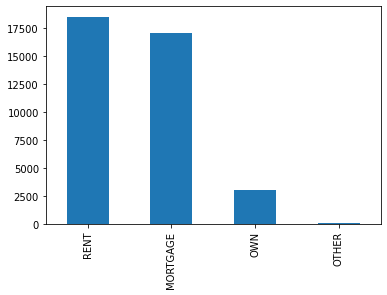

In [588]:
final_clean_df.home_ownership.value_counts().plot.bar()
plt.show()

# Analysing the purpose of loan to see which loan type is more popular among customers

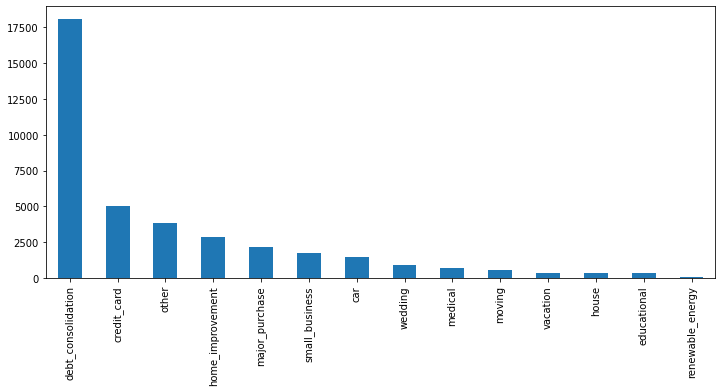

In [589]:
final_clean_df.purpose.value_counts().plot.bar(figsize=(12,5))
plt.show()

# Analysing the loan terms to see people are taking longer loan or shorter loan
# Analysis shows shorter loan are more popular among public

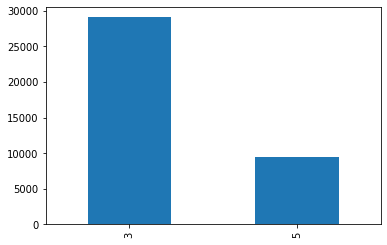

In [590]:
final_clean_df.term_in_years.value_counts().plot.bar()
plt.show()

# State wise number of loan taken distribution to see which state is more important for nusiness
# It is possible that CA- California being the populas city people are more towards loan taker

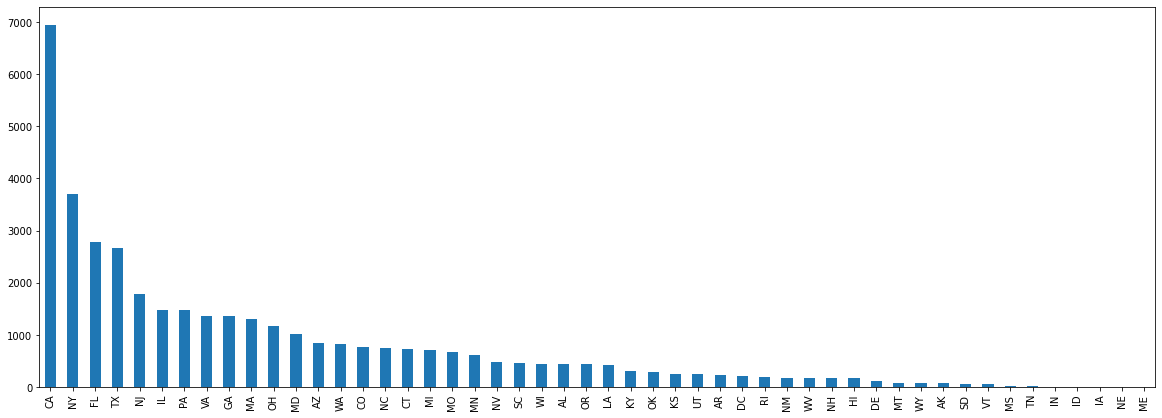

In [591]:
final_clean_df.addr_state.value_counts().plot.bar(figsize=(20,7))
plt.show()

# Analysis about the month which are more important where number of loan applications are more

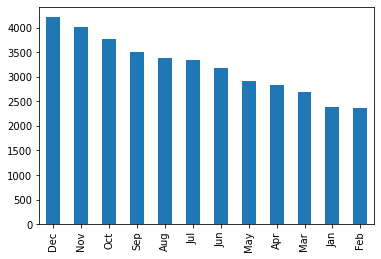

In [592]:
final_clean_df.month.value_counts().plot.bar()
plt.show()

# analysisng how loan are taken among the employee length categories

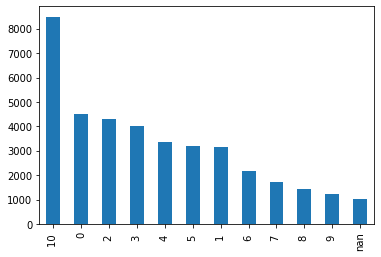

In [593]:
final_clean_df.emp_length_years.value_counts().plot.bar()
plt.show()

# analysis about the loan verification status finding number of loans in each category

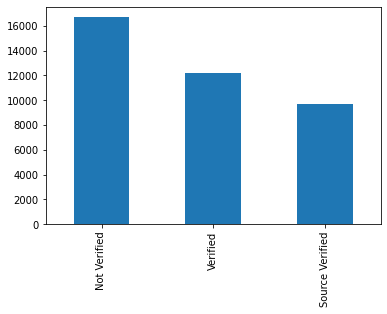

In [594]:
final_clean_df.verification_status.value_counts().plot.bar()
plt.show()

# B grade people seems to have higher loan taker

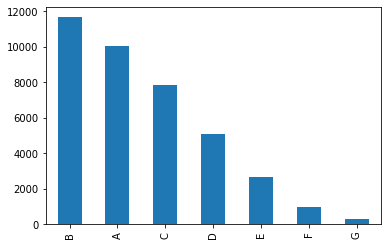

In [595]:
final_clean_df.grade.value_counts().plot.bar()
plt.show()

# Continous Data

# Applying Binning/grouping on Income of Applicants

# Checking debt to income ration for applicants

In [596]:
continous_univariate_final_df = final_clean_df

# This below graph shows that maximum loan amount ranges from 5000 to 15000  --- INSIGHTS

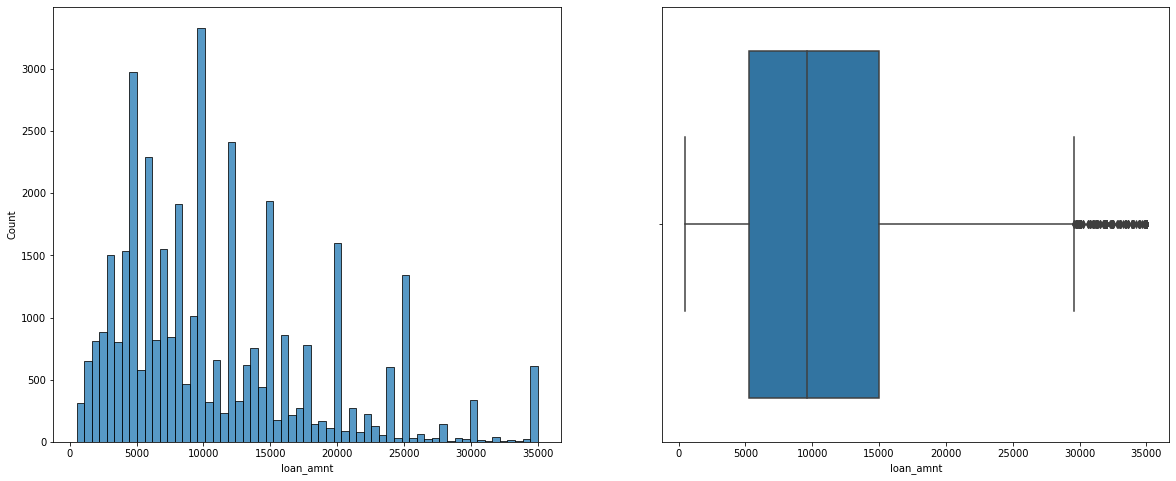

In [597]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(continous_univariate_final_df['loan_amnt'],ax=ax1)
sns.boxplot(data=continous_univariate_final_df,x='loan_amnt')
plt.show()

# The below analysis shows that the annual income of maximum loan borower lies between 35000 USD to 95000 USD

In [598]:
# Since there is a huge difference in the annual income value between 995 to 100 percentile hence taking the value before that and plotting the graph
continous_univariate_final_df.annual_inc.quantile(0.995)

300000.0

In [599]:
continous_univariate_final_df.annual_inc.quantile(0.996)

319027.1999999881

In [602]:
quantile_value = continous_univariate_final_df.annual_inc.quantile(0.995)
quantile_value

300000.0

In [608]:
continous_univariate_final_df = continous_univariate_final_df[continous_univariate_final_df.annual_inc.apply(lambda x : float(x)) < quantile_value]

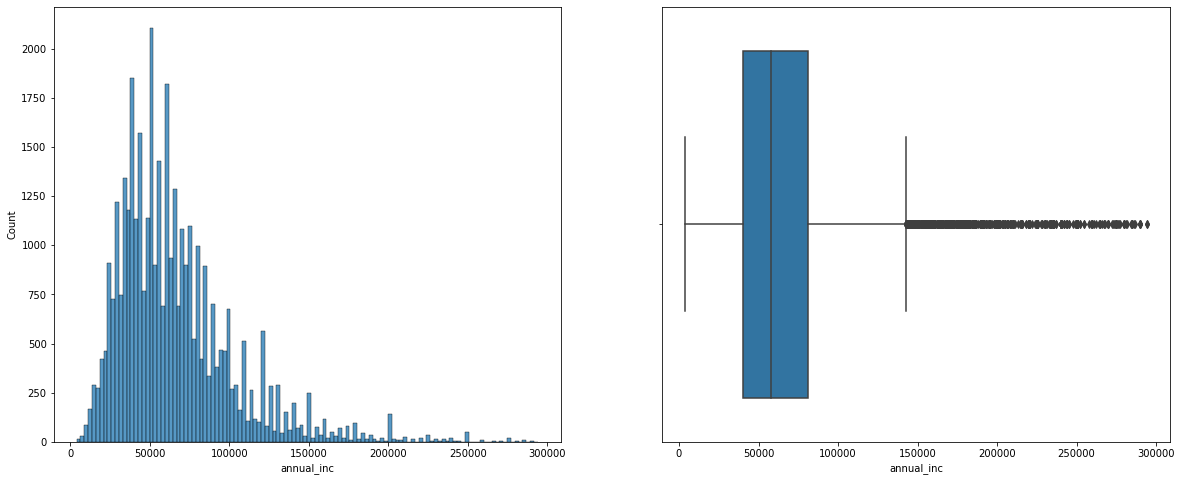

In [610]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(continous_univariate_final_df['annual_inc'],ax=ax1)
sns.boxplot(data=continous_univariate_final_df,x='annual_inc')
plt.show()